In [16]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

#Set the filename to the location of the file containing the logs of the run
filename="logs/exampleOutput"

# Throughput analysis example

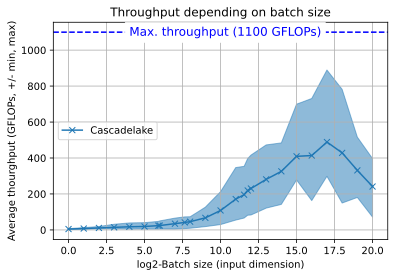

In [19]:
fig, ax = plt.subplots()

#Use the get_x_y_axis function with the right aggregation
(x, ymin) = get_x_y_axis(filename, aggreg=np.min)
(x, ymax) = get_x_y_axis(filename, aggreg=np.max)
(x, ymean) = get_x_y_axis(filename, aggreg=np.mean)

#Plot results
ax.plot(np.log2(x), ymean, 'x-', label="Cascadelake", color='C0')
plt.fill_between(np.log2(x), ymin, ymax, color='C0', alpha=0.5)


plt.ylabel("Average thourghput (GFLOPs, +/- min, max)")
plt.xlabel("log2-Batch size (input dimension)")
plt.axhline(y =1100, color = 'b', linestyle = '--')
plt.text(4, 1080, 'Max. throughput (1100 GFLOPs)', fontsize=12, backgroundcolor='w', color='b')
plt.title("Throughput depending on batch size")
plt.grid()
plt.legend(loc=6)
plt.show()

# Duration and speedup benchmarking

In [13]:
dictOptane = get_x_y_axis_duration(filename)

batch_sizes = [int(e) for e in list(dictOptane.keys())]
o_speedup = [dictOptane[e]['speedup'] for e in dictOptane]
o_perf_opt = [dictOptane[e]['optimized'] for e in dictOptane]
o_perf_unopt = [dictOptane[e]['unoptimized'] for e in dictOptane]

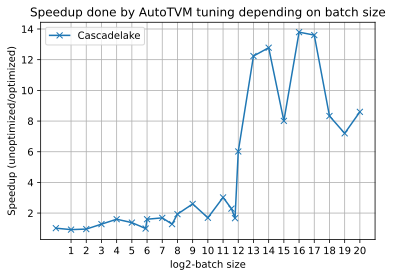

In [22]:
plt.plot(np.log2(batch_sizes), o_speedup,'x-', label='Cascadelake')

plt.title("Speedup done by AutoTVM tuning depending on batch size")
plt.legend()
plt.xlabel('log2-batch size')
plt.ylabel("Speedup (unoptimized/optimized)")
plt.xticks(range(1,21))
plt.grid()

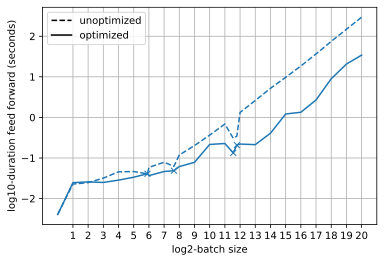

In [20]:
from matplotlib.lines import Line2D


markers_on=[6,9,14,15]
plt.plot(np.log2(batch_sizes), np.log10(o_perf_opt),'x-', markevery=markers_on)

plt.plot(np.log2(batch_sizes), np.log10(o_perf_unopt),'--', c='C0')
 
handles, labels = plt.gca().get_legend_handles_labels()

line1 = Line2D([0], [0], label='unoptimized', color='k', linestyle='--')
line2 = Line2D([0], [0], label='optimized', color='k')

handles.extend([line1, line2])

plt.title("Feed forward duration depending on batch size")
plt.legend(handles=handles)
plt.xlabel('log2-batch size')
plt.ylabel("log10-duration feed forward (seconds)")
plt.xticks(range(1,21))
plt.grid()
plt.show()